# Load in data

In [0]:
# Geeky stuff
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DataConversionWarning)

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix


# the 'excel'-module
import pandas as pd

# data urls
X_url = "https://raw.githubusercontent.com/roderickwlucas/TaxTechnology/master/Lectures/ML/X.csv"
y_url = "https://raw.githubusercontent.com/roderickwlucas/TaxTechnology/master/Lectures/ML/y.csv"

# retrieve the data
X = pd.read_csv(X_url, sep=';')
y = pd.read_csv(y_url, sep=';')

# print the shape
print('X shape', X.shape)
print('y shape', y.shape)

X shape (1309, 27)
y shape (1309, 1)


# Split data into Train & Test

In [0]:
# Train-test split module
from sklearn.model_selection import train_test_split

# split up the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)

X_train (877, 27)
y_train (877, 1)
X_test (432, 27)
y_test (432, 1)


# Linear Regression

In [0]:
# Import logistic regression
from sklearn.linear_model import LogisticRegression

# Load model
clf = LogisticRegression()

# Train the model
clf = clf.fit(X_train, y_train)

# predict test set with trained model
predict = clf.predict(X_test)

In [0]:
accuracy_score(y_test, predict)

0.625

In [0]:
confusion_matrix(y_test, predict)

array([[ 34, 144],
       [ 18, 236]])

# Naive Bayes

In [0]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

#Neural Networks

In [0]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(hidden_layer_sizes=1, activation='logistic')

clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

0.5462962962962963

# Decision Tree

In [0]:
from sklearn import tree

clf = tree.DecisionTreeClassifier(max_depth=5)
clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

0.7615740740740741

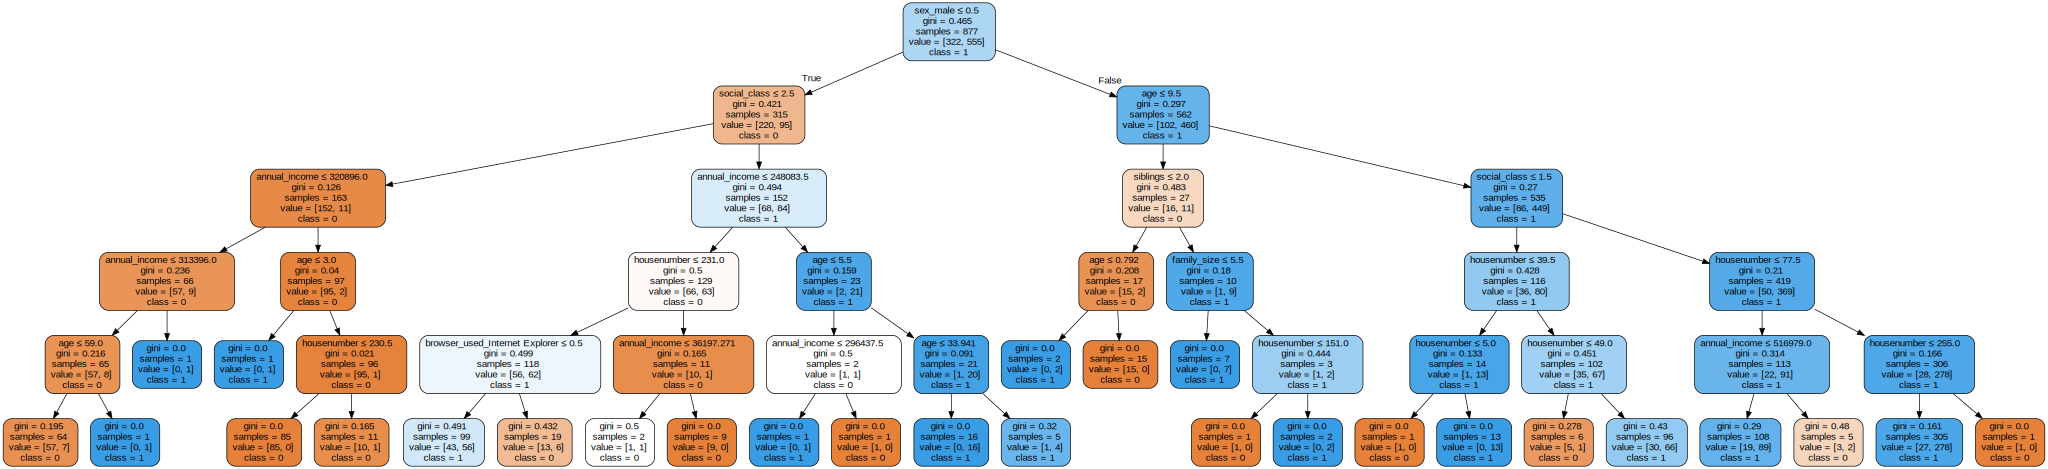

In [0]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=X_train.columns,  
                     class_names=['0', '1'],  
                     filled=True, rounded=True,  
                     special_characters=True)  

graph = graphviz.Source(dot_data)  

graph 

# Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=10, max_depth=4)

clf = clf.fit(X_train, y_train)

predict = clf.predict(X_test)

accuracy_score(y_test, predict)

0.8171296296296297

In [0]:
importance = pd.DataFrame(list(zip(importances, feat_labels)), columns=['Importance', 'Name'])
importance.sort_values(by='Importance', ascending=False)

,Importance,Name
26,0.2,sex_male
21,0.2,title_Mr
18,0.1,title_Miss
22,0.1,title_Mrs
20,0.1,title_Mme
0,0.1,age
2,0.1,siblings
4,0.1,annual_income
6,0.0,family_size
17,0.0,title_Master
